In [1]:

import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
file_path = "..\\datasets\\base\\ru\\raw"


In [3]:
df = pd.read_csv(file_path + "\\train_ru.csv", sep='\t', encoding='cp1251')
df = df.loc[df['RGNTI'].apply(lambda x: re.findall("\d+",x)!=[])] # Пропускаем строки без класса
df = df.dropna(subset=['ref_txt'])
df_test = pd.read_csv(file_path + "\\test_ru.csv", sep='\t', encoding='cp1251',
                   on_bad_lines='skip')
df_test = df_test.loc[df_test['RGNTI'].apply(lambda x: re.findall("\d+",x)!=[])]
df_test = df_test.dropna(subset=['ref_txt'])

df['target'] = df['RGNTI'].apply(lambda x:
                                list(set([re.findall("\d+",el)[0]
                                            for el in x.split('\\')]))) # Для каждой строки извлекаем значения ГРНТИ 1 уровня

df_test['target'] = df_test['RGNTI'].apply(lambda x:
                                list(set([re.findall("\d+",el)[0]
                                            for el in x.split('\\')])))
df['target_2'] = df['RGNTI'].apply(lambda x:
                                list(set([re.findall("\d+.\d+",el)[0]
                                            for el in x.split('\\')])))
df_test['target_2'] = df_test['RGNTI'].apply(lambda x:
                                list(set([re.findall("\d+.\d+",el)[0]
                                            for el in x.split('\\')])))

In [4]:
with open('GRNTI_1_ru.json', "r", encoding='utf-8') as code_file:
    grnti_mapping_dict_true_names = json.load(code_file) # Загружаем файл с кодами

In [5]:
grnti_mapping_dict_true_names

{'00': 'Общественные науки в целом',
 '02': 'Философия',
 '03': 'История. Исторические науки',
 '04': 'Социология',
 '05': 'Демография',
 '06': 'Экономика и экономические науки',
 '10': 'Государство и право. Юридические науки',
 '11': 'Политика и политические науки',
 '12': 'Науковедение',
 '13': 'Культура. Культурология',
 '14': 'Народное образование. Педагогика',
 '15': 'Психология',
 '16': 'Языкознание',
 '17': 'Литература. Литературоведение. Устное народное творчество',
 '18': 'Искусство. Искусствоведение',
 '19': 'Массовая коммуникация. Журналистика. Средства массовой информации',
 '20': 'Информатика',
 '21': 'Религия. Атеизм',
 '23': 'Комплексное изучение отдельных стран и регионов',
 '26': 'Комплексные проблемы общественных наук',
 '27': 'Математика',
 '28': 'Кибернетика',
 '29': 'Физика',
 '30': 'Механика',
 '31': 'Химия',
 '34': 'Биология',
 '36': 'Геодезия. Картография',
 '37': 'Геофизика',
 '38': 'Геология',
 '39': 'География',
 '41': 'Фстрономия',
 '43': 'Общие и комплексны

In [6]:
targets = pd.value_counts(np.concatenate(df['target'].values))

In [7]:
targets

34    43696
29    34595
31    28601
61    25203
55    22448
87    21396
53    14535
73    13767
52    13632
44    13082
81    12123
38    12119
39    11836
89    10120
47    10019
76     7921
06     7870
30     7166
50     6928
41     6767
27     5978
68     5690
37     4900
28     4671
45     4590
70     4393
49     3896
62     2961
20     2953
65     2880
90     2815
82     2471
15     2333
36     2273
60     1734
64     1708
66      599
75      449
67      442
19      413
12      196
69      170
86       63
00       50
59        9
58        7
84        1
dtype: int64

In [8]:
target_names = []
for el in targets.index:
    st_name = grnti_mapping_dict_true_names[el]
    serch_res = re.search(r"\.", st_name)
    if serch_res:
        target_names.append(st_name[:serch_res.start()])
    else:
        target_names.append(st_name)


In [9]:
target_names

['Биология',
 'Физика',
 'Химия',
 'Химическая технология',
 'Машиностроение',
 'Охрана окружающей среды',
 'Металлургия',
 'Транспорт',
 'Горное дело',
 'Энергетика',
 'Общие и комплексные проблемы технических и прикладных наук и отрас-лей народного хозяйства',
 'Геология',
 'География',
 'Космические исследования',
 'Электроника',
 'Медицина и здравоохранение',
 'Экономика и экономические науки',
 'Механика',
 'Автоматика',
 'Фстрономия',
 'Математика',
 'Сельское и лесное хозяйство',
 'Геофизика',
 'Кибернетика',
 'Электротехника',
 'Водное хозяйство',
 'Связь',
 'Биотехнология',
 'Информатика',
 'Пищевая промышленность',
 'Метрология',
 'Организация и управление',
 'Психология',
 'Геодезия',
 'Полиграфия',
 'Легкая промышленность',
 'Лесная и деревообрабатывающая промышленность',
 'Жилищно-коммунальное хозяйство',
 'Строительство',
 'Массовая коммуникация',
 'Науковедение',
 'Рыбное хозяйство',
 'Охрана труда',
 'Общественные науки в целом',
 'Приборостроение',
 'Ядерная техника',


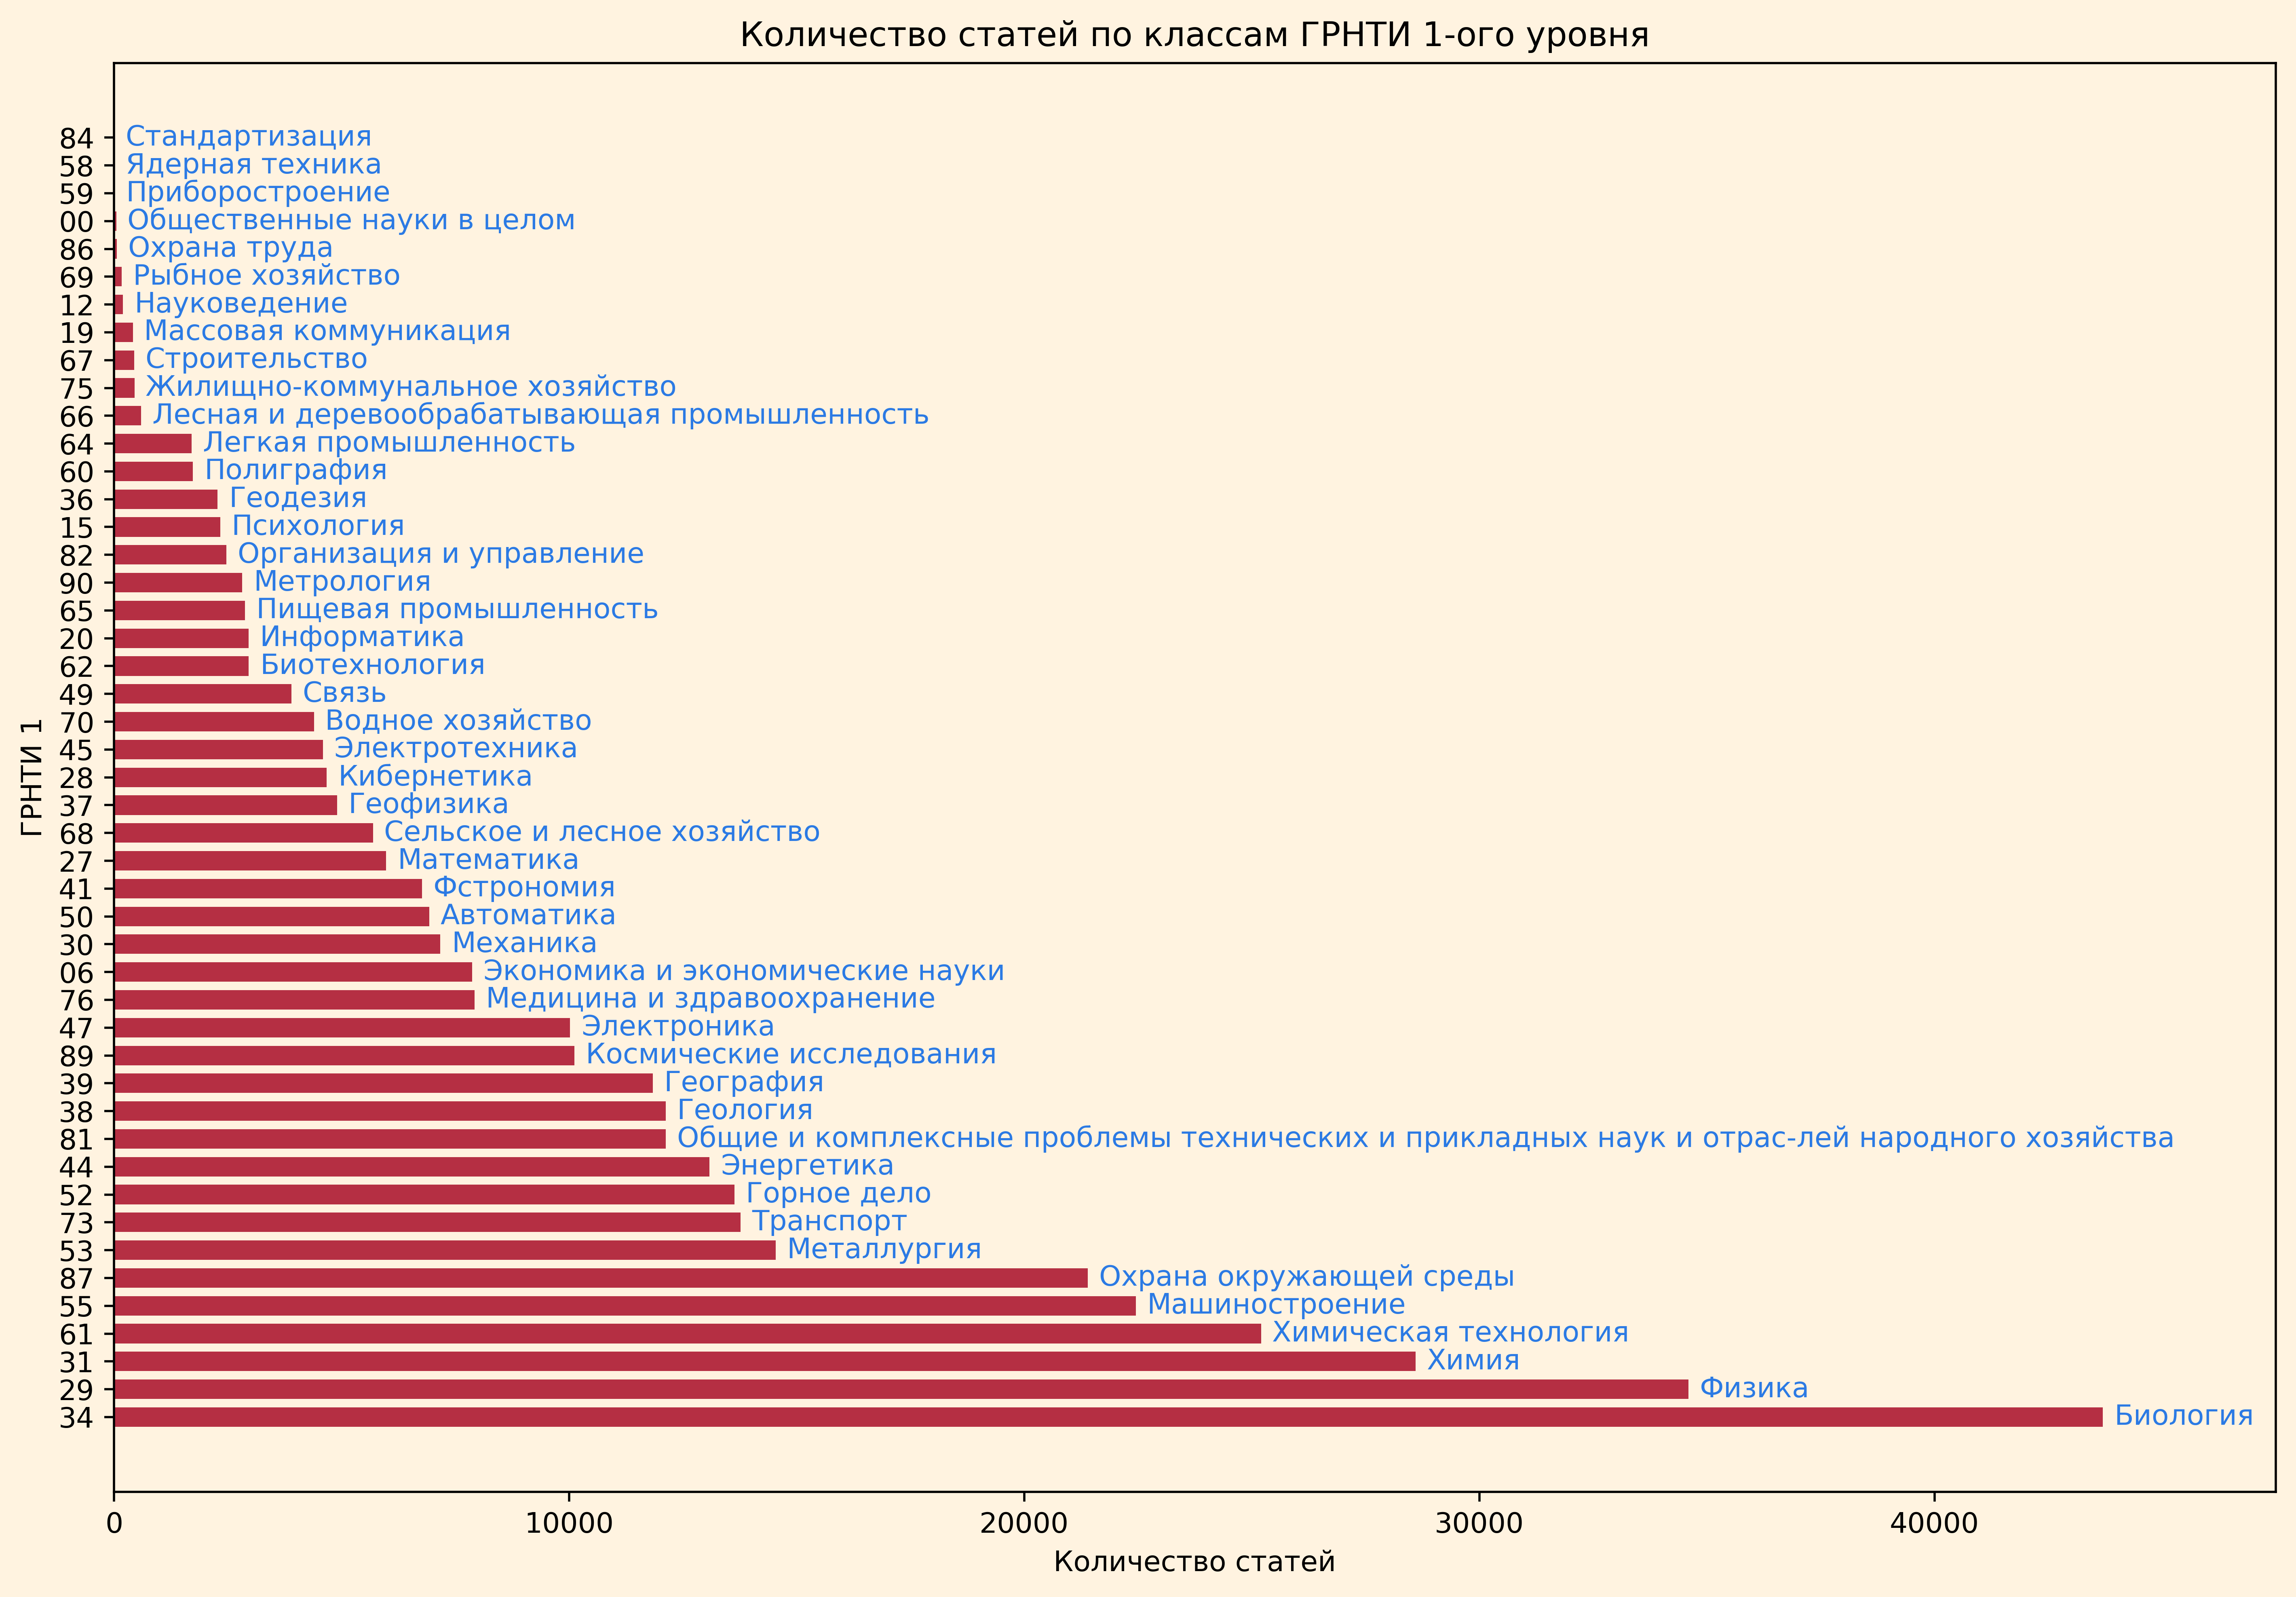

In [31]:
#creating a figure
fig = plt.figure(facecolor = "#fff3e0",figsize=(12,8), dpi=500)

#creating an axes
ax = plt.subplot(111,facecolor = "#fff3e0")

# specify the height of the bars
height= 0.7
# Make a horizontal barplot on the Axes
hbars = ax.barh(
    targets.index,
    targets,
    height=height,
    color="#b52f43"
    )
ax.bar_label(hbars,  labels=target_names,
             padding=4, color='#2b7ae4', fontsize=10)
ax.set_xlim(right=47500)  # adjust xlim to fit labels

plt.title("Количество статей по классам ГРНТИ 1-ого уровня")
plt.ylabel("ГРНТИ 1")
plt.xlabel("Количество статей")
plt.tight_layout()
plt.savefig("количество_статей по классам_1.jpeg")

In [32]:
df.head()


,id_publ,title,ref_txt,kw_list,SUBJ,IPV,RGNTI,eor,target,target_2
0,19.06-73.269,Некоторые аспекты изменения степных ландшафтов...,Предлагается результат анализа динамики некото...,Урало-Заволжье\анализ динамики\ландшафты\нефте...,f3\e2,72\73,87.29.29\89.57.45\89.57.45,###,"[89, 87]","[87.29, 89.57]"
1,19.01-24А.85,Подходы к повышению точности определения харак...,В статье представлены подходы к повышению точн...,метровый диапазон\обнаружение сигналов\подвижн...,e1,24А,47.05.11,###,[47],[47.05]
2,19.06-66.105,Микроскопическое моделирование фазового поля п...,Процесс выделения сплава Ni[75]Al[15]Ti[10] мо...,"Ni[75]Al[15]Ti[10], моделирование выделения, к...",f1\f7,15И\66,53.49.05\81.33.07,###,"[81, 53]","[81.33, 53.49]"
3,19.06-14Б.10,МОДЕЛИ И МЕТОДИКИ АВТОМАТИЗАЦИИ ПРОЦЕДУР РАЗРА...,Объектом исследования является проектирование ...,автоматизированное проектирование\обработка ме...,e9,14Б,55.13.15,###,[55],[55.13]
4,19.10-19Ж.456,Трехкомпонентная реакция Кастагноли-Кушмана 3-...,Попытки использования 3-арилглутаконовых кисло...,"3-арил-\4,6-диарил-1,6-дигидро-\Кастаньоли_-Ку...",f7,19Ж,31.21.27,###,[31],[31.21]


In [33]:
sets = {}
# targets = []
for target, ref_text in zip(df["target"], df["ref_txt"]):
    len_ref_text = len(ref_text)
    number_of_repeats = len_ref_text // 512  + (len_ref_text % 512 !=0)
    for el in target:
        sets.setdefault(el, 0)
        sets[el] += number_of_repeats

In [34]:
sorted_set = {k: v for k, v in sorted(sets.items(), key=lambda item: item[1], reverse=True)}

In [35]:
target_names2 = []
for el in sorted_set.keys():
    st_name = grnti_mapping_dict_true_names[el]
    serch_res = re.search(r"\.", st_name)
    if serch_res:
        target_names2.append(st_name[:serch_res.start()])
    else:
        target_names2.append(st_name)

In [36]:
#    ax.text(x_value if len(name) < 10 else x_value + len(name)*160, 
            # i + 1.5, name + " ", color="#2b7ae4",#"#faebd7", b52f43[42400, 33550, 27700, 22100, 20200, 17800]
            # ha='center', va='top', fontsize=10)


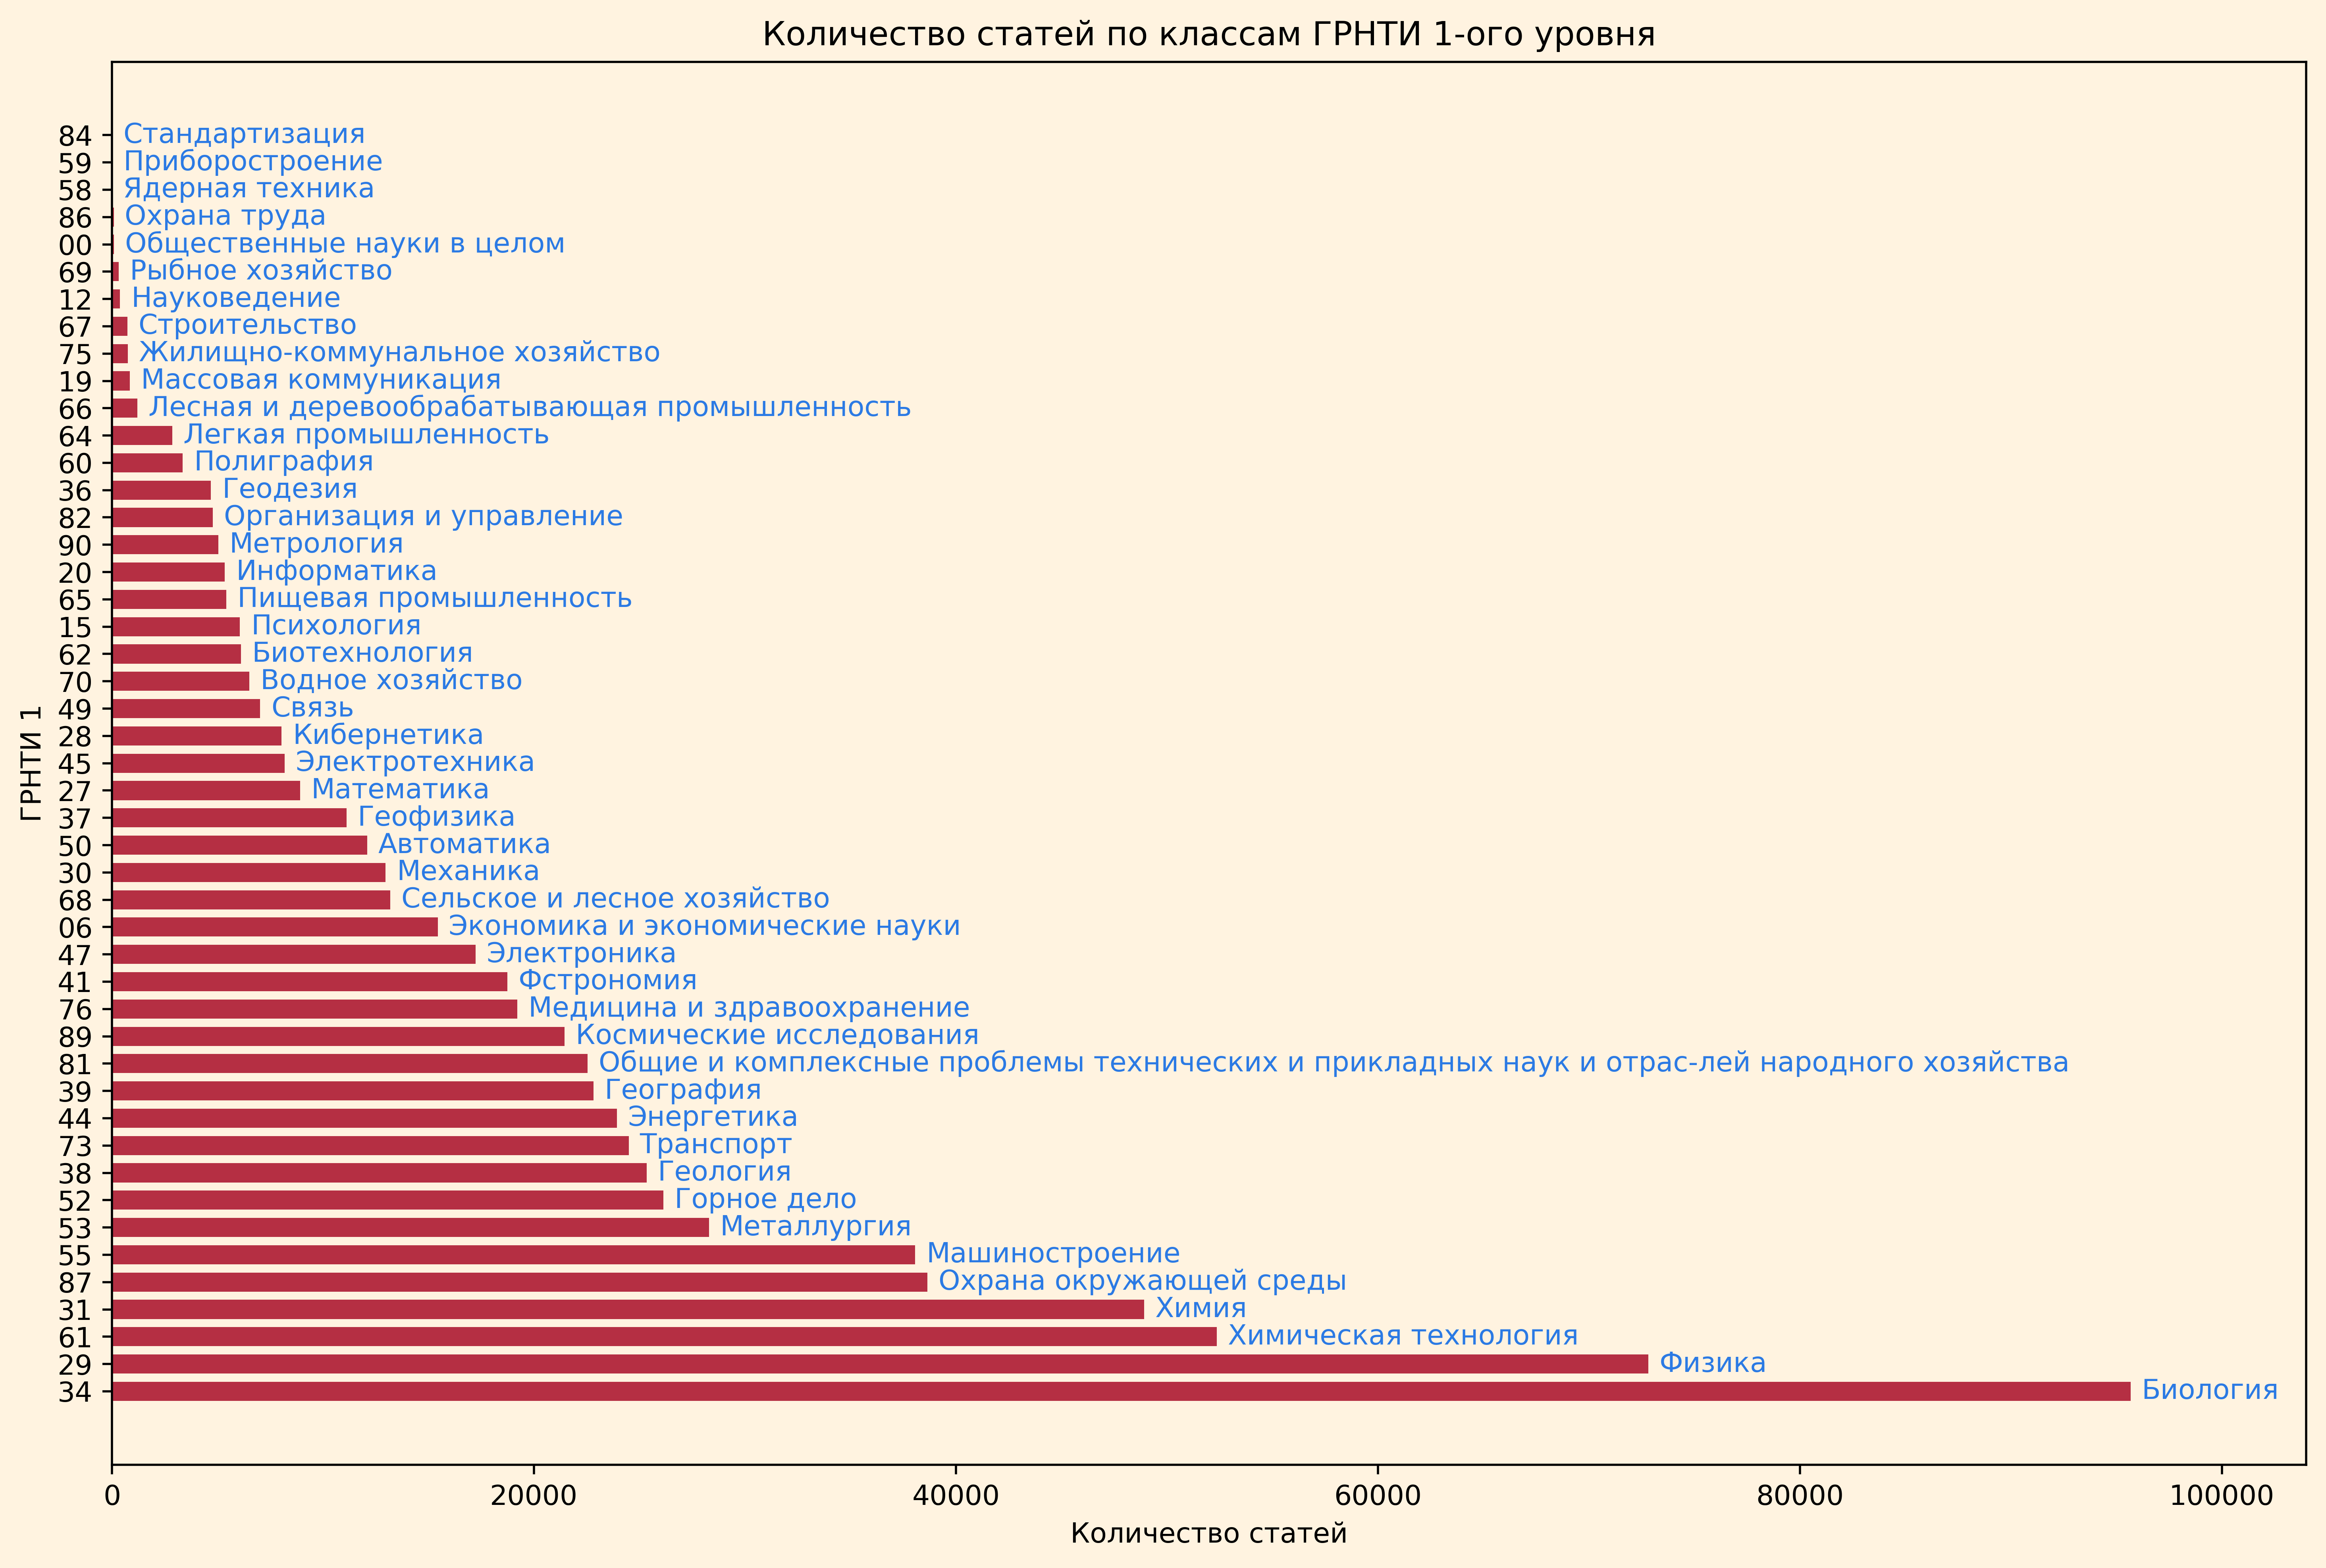

In [42]:
#creating a figure
fig = plt.figure(facecolor = "#fff3e0",figsize=(12,8), dpi=500)

#creating an axes
ax = plt.subplot(111,facecolor = "#fff3e0")

# specify the height of the bars
height= 0.7
# Make a horizontal barplot on the Axes
hbars2 = ax.barh(
    list(sorted_set.keys()),
    list(sorted_set.values()),
    height=height,
    color="#b52f43"
    )
 
ax.bar_label(hbars2,  labels=target_names2,
             padding=4, color='#2b7ae4', fontsize=10)
ax.set_xlim(right=104000)  # adjust xlim to fit labels

# for i, (name, x_value) in enumerate(zip(target_names2[:6], list(sorted_set.values())[:6])):
#    ax.text(x_value if len(name) < 15 else x_value + len(name)*400, 
#             i + 1.2, name + " ", color="#2b7ae4",#"#faebd7", b52f43[42400, 33550, 27700, 22100, 20200, 17800]
#             ha='center', va='top', fontsize=10)
plt.title("Количество статей по классам ГРНТИ 1-ого уровня")
plt.ylabel("ГРНТИ 1")
plt.xlabel("Количество статей")
plt.tight_layout()
plt.savefig("количество_статей по классам_2.jpeg")